In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.set_option('display.max_columns', 100)

In [19]:
train = pd.read_csv('../input/train.csv', index_col = 0)
train.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [20]:
train.shape

(233154, 40)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
DISBURSED_AMOUNT                       233154 non-null int64
ASSET_COST                             233154 non-null int64
LTV                                    233154 non-null float64
BRANCH_ID                              233154 non-null int64
SUPPLIER_ID                            233154 non-null int64
MANUFACTURER_ID                        233154 non-null int64
CURRENT_PINCODE_ID                     233154 non-null int64
DATE_OF_BIRTH                          233154 non-null object
EMPLOYMENT_TYPE                        225493 non-null object
DISBURSAL_DATE                         233154 non-null object
STATE_ID                               233154 non-null int64
EMPLOYEE_CODE_ID                       233154 non-null int64
MOBILENO_AVL_FLAG                      233154 non-null int64
AADHAR_FLAG                            233154 non-null int64
PAN_FLAG                 

#### Only one column employment type has missing entries


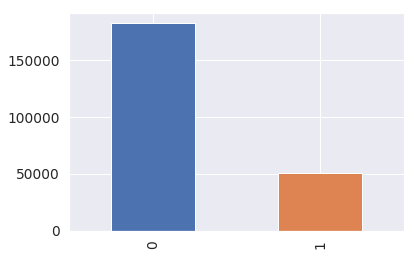

In [22]:
target = train['LOAN_DEFAULT']
target.value_counts().plot.bar()

***Imbalanced Target class***

**convert columns having data in year and month in month only**

In [23]:
new = []
for items in train['AVERAGE_ACCT_AGE'].values: 
    y = int(items[0]) * 12
    if items[6]== 'm':
        m = int(items[5])
    else:
        m = int(items[5:7])
    total = y + m
    new.append(total)

train.loc[:, 'AVERAGE_ACCT_AGE'] = new



new = []
for items in train['CREDIT_HISTORY_LENGTH'].values: 
    y = int(items[0]) * 12
    if items[6]== 'm':
        m = int(items[5])
    else:
        m = int(items[5:7])
    total = y + m
    new.append(total)

train.loc[:, 'CREDIT_HISTORY_LENGTH'] = new

**Check columns credit_history_length and Average_ACCT_AGE**

In [24]:
train.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


**Convert Data Types of data columns and employment type to category**

In [25]:
train.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')

In [26]:
train['DATE_OF_BIRTH'] = pd.to_datetime(train['DATE_OF_BIRTH'])
train['DISBURSAL_DATE'] = pd.to_datetime(train['DISBURSAL_DATE'])
train['EMPLOYMENT_TYPE'] = train['EMPLOYMENT_TYPE'].astype('category')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
DISBURSED_AMOUNT                       233154 non-null int64
ASSET_COST                             233154 non-null int64
LTV                                    233154 non-null float64
BRANCH_ID                              233154 non-null int64
SUPPLIER_ID                            233154 non-null int64
MANUFACTURER_ID                        233154 non-null int64
CURRENT_PINCODE_ID                     233154 non-null int64
DATE_OF_BIRTH                          233154 non-null datetime64[ns]
EMPLOYMENT_TYPE                        225493 non-null category
DISBURSAL_DATE                         233154 non-null datetime64[ns]
STATE_ID                               233154 non-null int64
EMPLOYEE_CODE_ID                       233154 non-null int64
MOBILENO_AVL_FLAG                      233154 non-null int64
AADHAR_FLAG                            233154 non-null int64
PAN_FLA

#### Treat Missing Values of Employment_Type

In [28]:
train['EMPLOYMENT_TYPE'] = train['EMPLOYMENT_TYPE'].fillna(method = 'bfill')

In [29]:
train = train.replace({'PERFORM_CNS_SCORE_DESCRIPTION':{'C-Very Low Risk':'Low', 'A-Very Low Risk':'Low',
                                                       'B-Very Low Risk':'Low', 'D-Very Low Risk':'Low',
                                                       'F-Low Risk':'Low', 'E-Low Risk':'Low', 'G-Low Risk':'Low',
                                                       'H-Medium Risk': 'Medium', 'I-Medium Risk': 'Medium',
                                                       'J-High Risk':'High', 'K-High Risk':'High','L-Very High Risk':'High',
                                                       'M-Very High Risk':'High','Not Scored: More than 50 active Accounts found':'Not Scored',
                                                       'Not Scored: Only a Guarantor':'Not Scored','Not Scored: Not Enough Info available on the customer':'Not Scored',
                                                        'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored','Not Scored: No Updates available in last 36 months':'Not Scored',
                                                       'Not Scored: Sufficient History Not Available':'Not Scored', 'No Bureau History Available':'Not Scored'
                                                       }})
                                                        

In [30]:
train['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

Not Scored    129785
Low            69022
High           21935
Medium         12412
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

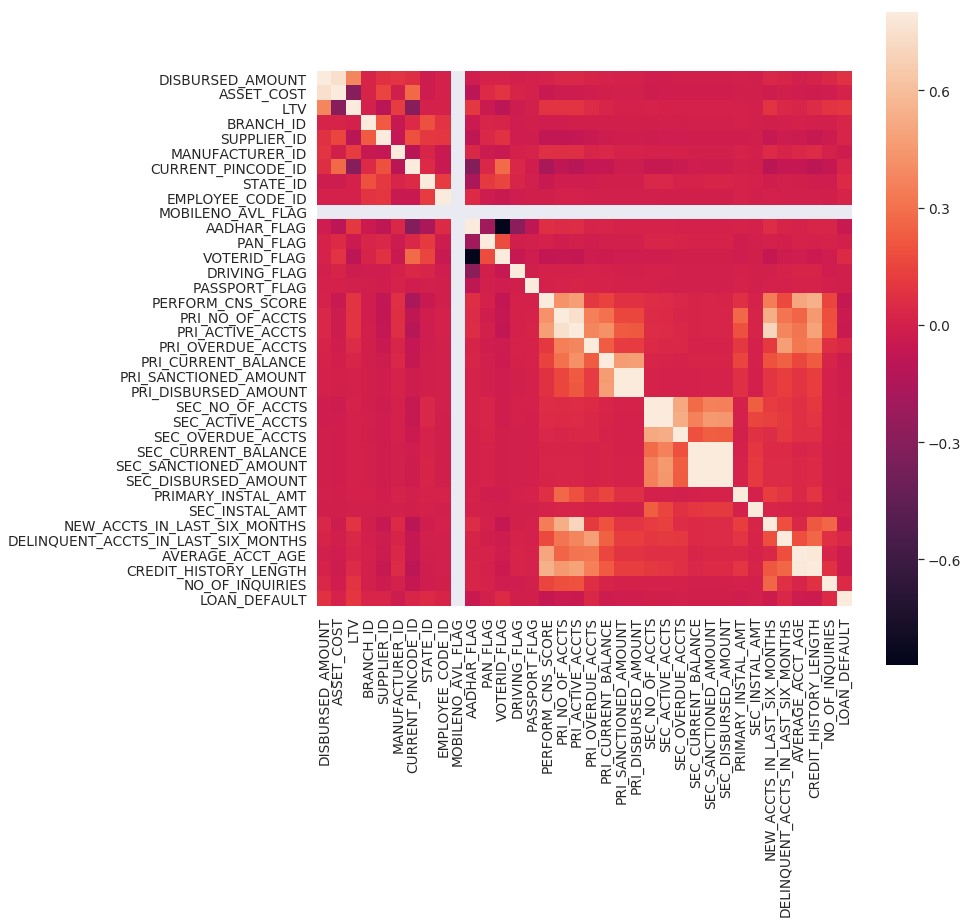

In [31]:
corr_mat = train.corr()
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr_mat, vmax = 0.8, square= True)

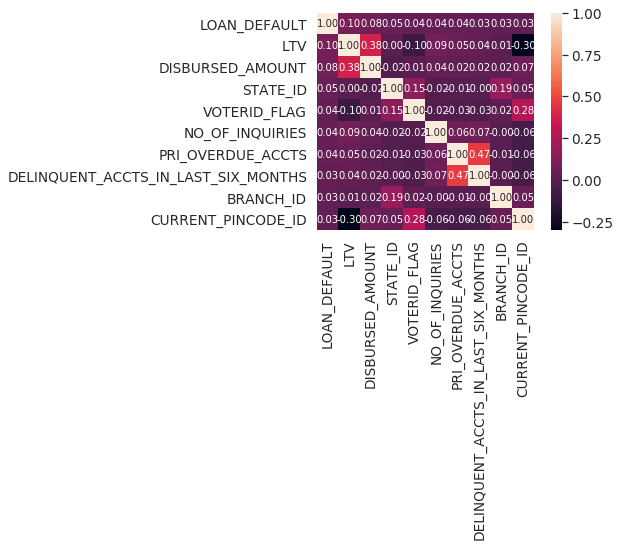

In [32]:
k = 10
cols = corr_mat.nlargest(k, 'LOAN_DEFAULT')['LOAN_DEFAULT'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Disbursed amount and asset cost highly correlated, also correlated to ltv
#### Average account age and credit history length correlated
#### Predictors SECX also highly correlated
#### ltv and current_pin_codeid correlated
#### PRI. OVERDUE.ACCTS and DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS highly correlated

In [33]:
corr_mat['LOAN_DEFAULT'].sort_values(ascending = False)

LOAN_DEFAULT                           1.000000
LTV                                    0.098208
DISBURSED_AMOUNT                       0.077675
STATE_ID                               0.048075
VOTERID_FLAG                           0.043747
NO_OF_INQUIRIES                        0.043678
PRI_OVERDUE_ACCTS                      0.040872
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    0.034462
BRANCH_ID                              0.030193
CURRENT_PINCODE_ID                     0.028419
SUPPLIER_ID                            0.027357
EMPLOYEE_CODE_ID                       0.020657
ASSET_COST                             0.014261
PAN_FLAG                               0.002046
SEC_OVERDUE_ACCTS                     -0.001371
SEC_INSTAL_AMT                        -0.001548
SEC_CURRENT_BALANCE                   -0.005531
DRIVING_FLAG                          -0.005821
SEC_ACTIVE_ACCTS                      -0.005993
SEC_DISBURSED_AMOUNT                  -0.006248
SEC_SANCTIONED_AMOUNT                 -0

#### No predictor has strong correlation with loan_default 

#### Hypothesis: Disbursed amount, ltv, delinquent accounts in last six months, primary current balance, credit history length, cns_score should contribute more in the loan_default.